In [1]:
# -*- coding: utf-8 -*-

#matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tweepy

In [2]:
# 발급 완료된 API_KEY를 입력합니다.
CONSUMER_KEY = "PPWQGTKtypktBZGi28w9kXBlT"
CONSUMER_SECRET = "ooE3ODXs1TjwyOCFnz6ZmaNOF6kKLpOatPdM4CAfSl4utKUasP"
ACCESS_TOKEN_KEY = "1337193557635944449-zO8IXaEsLOWbF93bE8ia5fMgLsJQ9m"
ACCESS_TOKEN_SECRET = "cvl1XInqSla8zqekLFaxNPuiwOVBx7IDQAxVMd1h9D91r"

# 개인정보 인증을 요청하는 Handler 입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

In [5]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
keyword = "손흥민"
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 트위터 API를 사용하여 '손흥민'이 포함된 100페이지의 트윗들을 크롤링한 뒤, 'text', 'created_at' 정보를 데이터 프레임으로 저장합니다.
for i in range(1,100):
    print("Get data", str(i), "% complete..")
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        # ignore_index = True : 인덱스 이름을 무시
        df = df.append(series, ignore_index=True)
print("Get data 100 % complete..")

Get data 1 % complete..
Get data 2 % complete..
Get data 3 % complete..
Get data 4 % complete..
Get data 5 % complete..
Get data 6 % complete..
Get data 7 % complete..
Get data 8 % complete..
Get data 9 % complete..
Get data 10 % complete..
Get data 11 % complete..
Get data 12 % complete..
Get data 13 % complete..
Get data 14 % complete..
Get data 15 % complete..
Get data 16 % complete..
Get data 17 % complete..
Get data 18 % complete..
Get data 19 % complete..
Get data 20 % complete..
Get data 21 % complete..
Get data 22 % complete..
Get data 23 % complete..
Get data 24 % complete..
Get data 25 % complete..
Get data 26 % complete..
Get data 27 % complete..
Get data 28 % complete..
Get data 29 % complete..
Get data 30 % complete..
Get data 31 % complete..
Get data 32 % complete..
Get data 33 % complete..
Get data 34 % complete..
Get data 35 % complete..
Get data 36 % complete..
Get data 37 % complete..
Get data 38 % complete..
Get data 39 % complete..
Get data 40 % complete..
Get data 

In [6]:
df.head()

created                                         tweet_text
0 2020-12-11 01:34:04                                 손 손흥민 흥 흥해라 민 민망하다
1 2020-12-11 01:30:22  기자🗣손흥민과 왜 다퉜어?\n요리스🗣그거 내가 아니라 내 동생이였어 https://...
2 2020-12-11 01:27:11  RT @yonhaptweet: '손흥민 교체출전' 토트넘, 앤트워프 꺾고 조 1위로...
3 2020-12-11 01:26:28  피파로 토트넘 고르면 손흥민한테 공주면 오오 빠르다 빨러~~ 하는데 케인한테 어시스...
4 2020-12-11 01:26:04  @Ikuchan_suki 초딩때 친구가 제 롤모델은 손흥민입니다 할 때 그게 누구나...

In [7]:
import re

# 텍스트 정제 함수: 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규 표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

# 'tweet_text' 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))

In [8]:
df.head()

created                                         tweet_text  \
0 2020-12-11 01:34:04                                 손 손흥민 흥 흥해라 민 민망하다   
1 2020-12-11 01:30:22  기자🗣손흥민과 왜 다퉜어?\n요리스🗣그거 내가 아니라 내 동생이였어 https://...   
2 2020-12-11 01:27:11  RT @yonhaptweet: '손흥민 교체출전' 토트넘, 앤트워프 꺾고 조 1위로...   
3 2020-12-11 01:26:28  피파로 토트넘 고르면 손흥민한테 공주면 오오 빠르다 빨러~~ 하는데 케인한테 어시스...   
4 2020-12-11 01:26:04  @Ikuchan_suki 초딩때 친구가 제 롤모델은 손흥민입니다 할 때 그게 누구나...   

                                             ko_text  
0                                 손 손흥민 흥 흥해라 민 민망하다  
1                  기자손흥민과 왜 다퉜어요리스그거 내가 아니라 내 동생이였어   
2    손흥민 교체출전 토트넘 앤트워프 꺾고 조 위로 유로파 강손흥민이 후반 교체 선수...  
3  피파로 토트넘 고르면 손흥민한테 공주면 오오 빠르다 빨러 하는데 케인한테 어시스트하...  
4   초딩때 친구가 제 롤모델은 손흥민입니다 할 때 그게 누구나고 했는데 이제는 외국인...

In [9]:
from konlpy.tag import Okt
from collections import Counter

In [10]:
# 한국어 약식 불용어 사전 예시 파일을 적용합니다.
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    # readlines()로 파일을 읽으면 한 줄, 한 줄이 각각 리스트의 원소로 들어갑니다.
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [11]:
def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한 글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [13]:
# 'ko_text' 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)

(1485, 4)


In [14]:
df.head()

created                                         tweet_text  \
0 2020-12-11 01:34:04                                 손 손흥민 흥 흥해라 민 민망하다   
1 2020-12-11 01:30:22  기자🗣손흥민과 왜 다퉜어?\n요리스🗣그거 내가 아니라 내 동생이였어 https://...   
2 2020-12-11 01:27:11  RT @yonhaptweet: '손흥민 교체출전' 토트넘, 앤트워프 꺾고 조 1위로...   
3 2020-12-11 01:26:28  피파로 토트넘 고르면 손흥민한테 공주면 오오 빠르다 빨러~~ 하는데 케인한테 어시스...   
4 2020-12-11 01:26:04  @Ikuchan_suki 초딩때 친구가 제 롤모델은 손흥민입니다 할 때 그게 누구나...   

                                             ko_text  \
0                                 손 손흥민 흥 흥해라 민 민망하다   
1                  기자손흥민과 왜 다퉜어요리스그거 내가 아니라 내 동생이였어    
2    손흥민 교체출전 토트넘 앤트워프 꺾고 조 위로 유로파 강손흥민이 후반 교체 선수...   
3  피파로 토트넘 고르면 손흥민한테 공주면 오오 빠르다 빨러 하는데 케인한테 어시스트하...   
4   초딩때 친구가 제 롤모델은 손흥민입니다 할 때 그게 누구나고 했는데 이제는 외국인...   

                                               nouns  
0                                              [손흥민]  
1                              [기자, 손흥민, 리스, 그거, 동생]  
2  [손흥민, 교체, 출전, 토트넘, 앤트워프, 위로, 유로파, 손흥민, 후반, 교체,...  
3                   [피파, 토트넘, 손흥민, 공주, 케인, 어시스트, 졸라]  
4                    [초딩, 친구, 롤모델, 손흥민, 그게, 이제, 외국인]

In [15]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=c555c5259d2b849a69baaf92540cd7eee6dd3c992b20974a5863f08b70669523
  Stored in directory: c:\users\lsc11\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [16]:
from apyori import apriori

In [18]:
# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '무리뉴']
]

# 연관 분석을 수행합니다.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'무리뉴'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'무리뉴'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '무리뉴'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '무리뉴'}), confidence=0.3333333333333333, lift=1.0), Orde

In [19]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인)처럼 규칙의 크기가 2 이하인 규칙을 추출합니다.
list(apriori(transactions,
            min_support = 0.5,
            min_confidence = 0.6,
            min_lift = 1.0, 
            max_length = 2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

In [20]:
# 데이터를 apyori에 활용 가능한 리스트 데이터로 변환합니다.
transactions = df['nouns'].tolist()
# 공백 문자열을 방치합니다.
transactions = [transaction for transaction in transactions if transaction]
print(transactions)

[['손흥민'], ['기자', '손흥민', '리스', '그거', '동생'], ['손흥민', '교체', '출전', '토트넘', '앤트워프', '위로', '유로파', '손흥민', '후반', '교체', '선수', '출전', '잉글랜드', '프로축구', '프리미어리그', '토트넘', '로열', '앤트워프', '벨기에'], ['피파', '토트넘', '손흥민', '공주', '케인', '어시스트', '졸라'], ['초딩', '친구', '롤모델', '손흥민', '그게', '이제', '외국인'], ['손흥민'], ['박지성', '의도', '한국', '최고', '축구선수', '차범근', '당시', '최고', '리그', '분데스리가', '공격수', '차붐', '가세', '우승', '손흥민', '가장', '사실', '박지성', '맨유', '교체'], ['손흥민', '교체', '출전', '토트넘', '앤트워프', '위로', '유로파', '손흥민', '후반', '교체', '선수', '출전', '잉글랜드', '프로축구', '프리미어리그', '토트넘', '로열', '앤트워프', '벨기에'], ['손흥민', '시대', '선수'], ['손흥민', '한국', '축구', '차붐', '가능성', '가장', '선수', '축구', '안보', '절실', '응원'], ['손흥민', '교체', '출전', '토트넘', '앤트워프', '위로', '유로파', '손흥민', '후반', '교체', '선수', '출전', '잉글랜드', '프로축구', '프리미어리그', '토트넘', '로열', '앤트워프', '벨기에'], ['손흥민', '교체', '출전', '토트넘', '앤트워프', '위로', '유로파', '손흥민', '후반', '교체', '선수', '출전', '잉글랜드', '프로축구', '프리미어리그', '토트넘', '로열', '앤트워프', '벨기에'], ['손흥민', '교체', '출전', '토트넘', '앤트워프', '위로', '유로파', '손흥민', '후반', '교체', '선수', '출전', '잉글랜드', '프로축구',

In [22]:
# 연관 분석을 수행합니다.
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인)처럼 규칙의 크기가 2 이하인 규칙을 추출합니다.
results = list(apriori(transactions,
                        min_support = 0.1,
                        min_confidence = 0.2,
                        min_lift = 5, 
                        max_length = 2))
print(results)

[RelationRecord(items=frozenset({'가장', '차붐'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가장'}), items_add=frozenset({'차붐'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'차붐'}), items_add=frozenset({'가장'}), confidence=1.0, lift=7.5)]), RelationRecord(items=frozenset({'가장', '한국'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'가장'}), items_add=frozenset({'한국'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'한국'}), items_add=frozenset({'가장'}), confidence=1.0, lift=7.5)]), RelationRecord(items=frozenset({'차붐', '한국'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'차붐'}), items_add=frozenset({'한국'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'한국'}), items_add=frozenset({'차붐'}), confidence=1.0, lift=7.5)])]


In [24]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 'source', 결과절을 'target', 지지도를 'support'라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

In [25]:
network_df.head()

source target   support
0     가장     차붐  0.133333
1     가장     한국  0.133333
2     차붐     한국  0.133333

In [27]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())

In [29]:
from konlpy.tag import Okt
from collections import Counter

In [41]:
# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한 글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 'node_df', 'nodesize_df'라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])

# 시각화의 편의를 위해 'nodesiez 50' 이하는 제거합니다.
node_df = node_df[node_df['nodesize'] >= 50]

In [42]:
node_df.head()

node  nodesize
0  손흥민      2178
1   기자        99
2   리스        99
3   그거        99
4   동생        99

In [32]:
!pip install networkx

In [49]:
# 연관 키워드 네트워크 시각화 하기
import networkx as nx

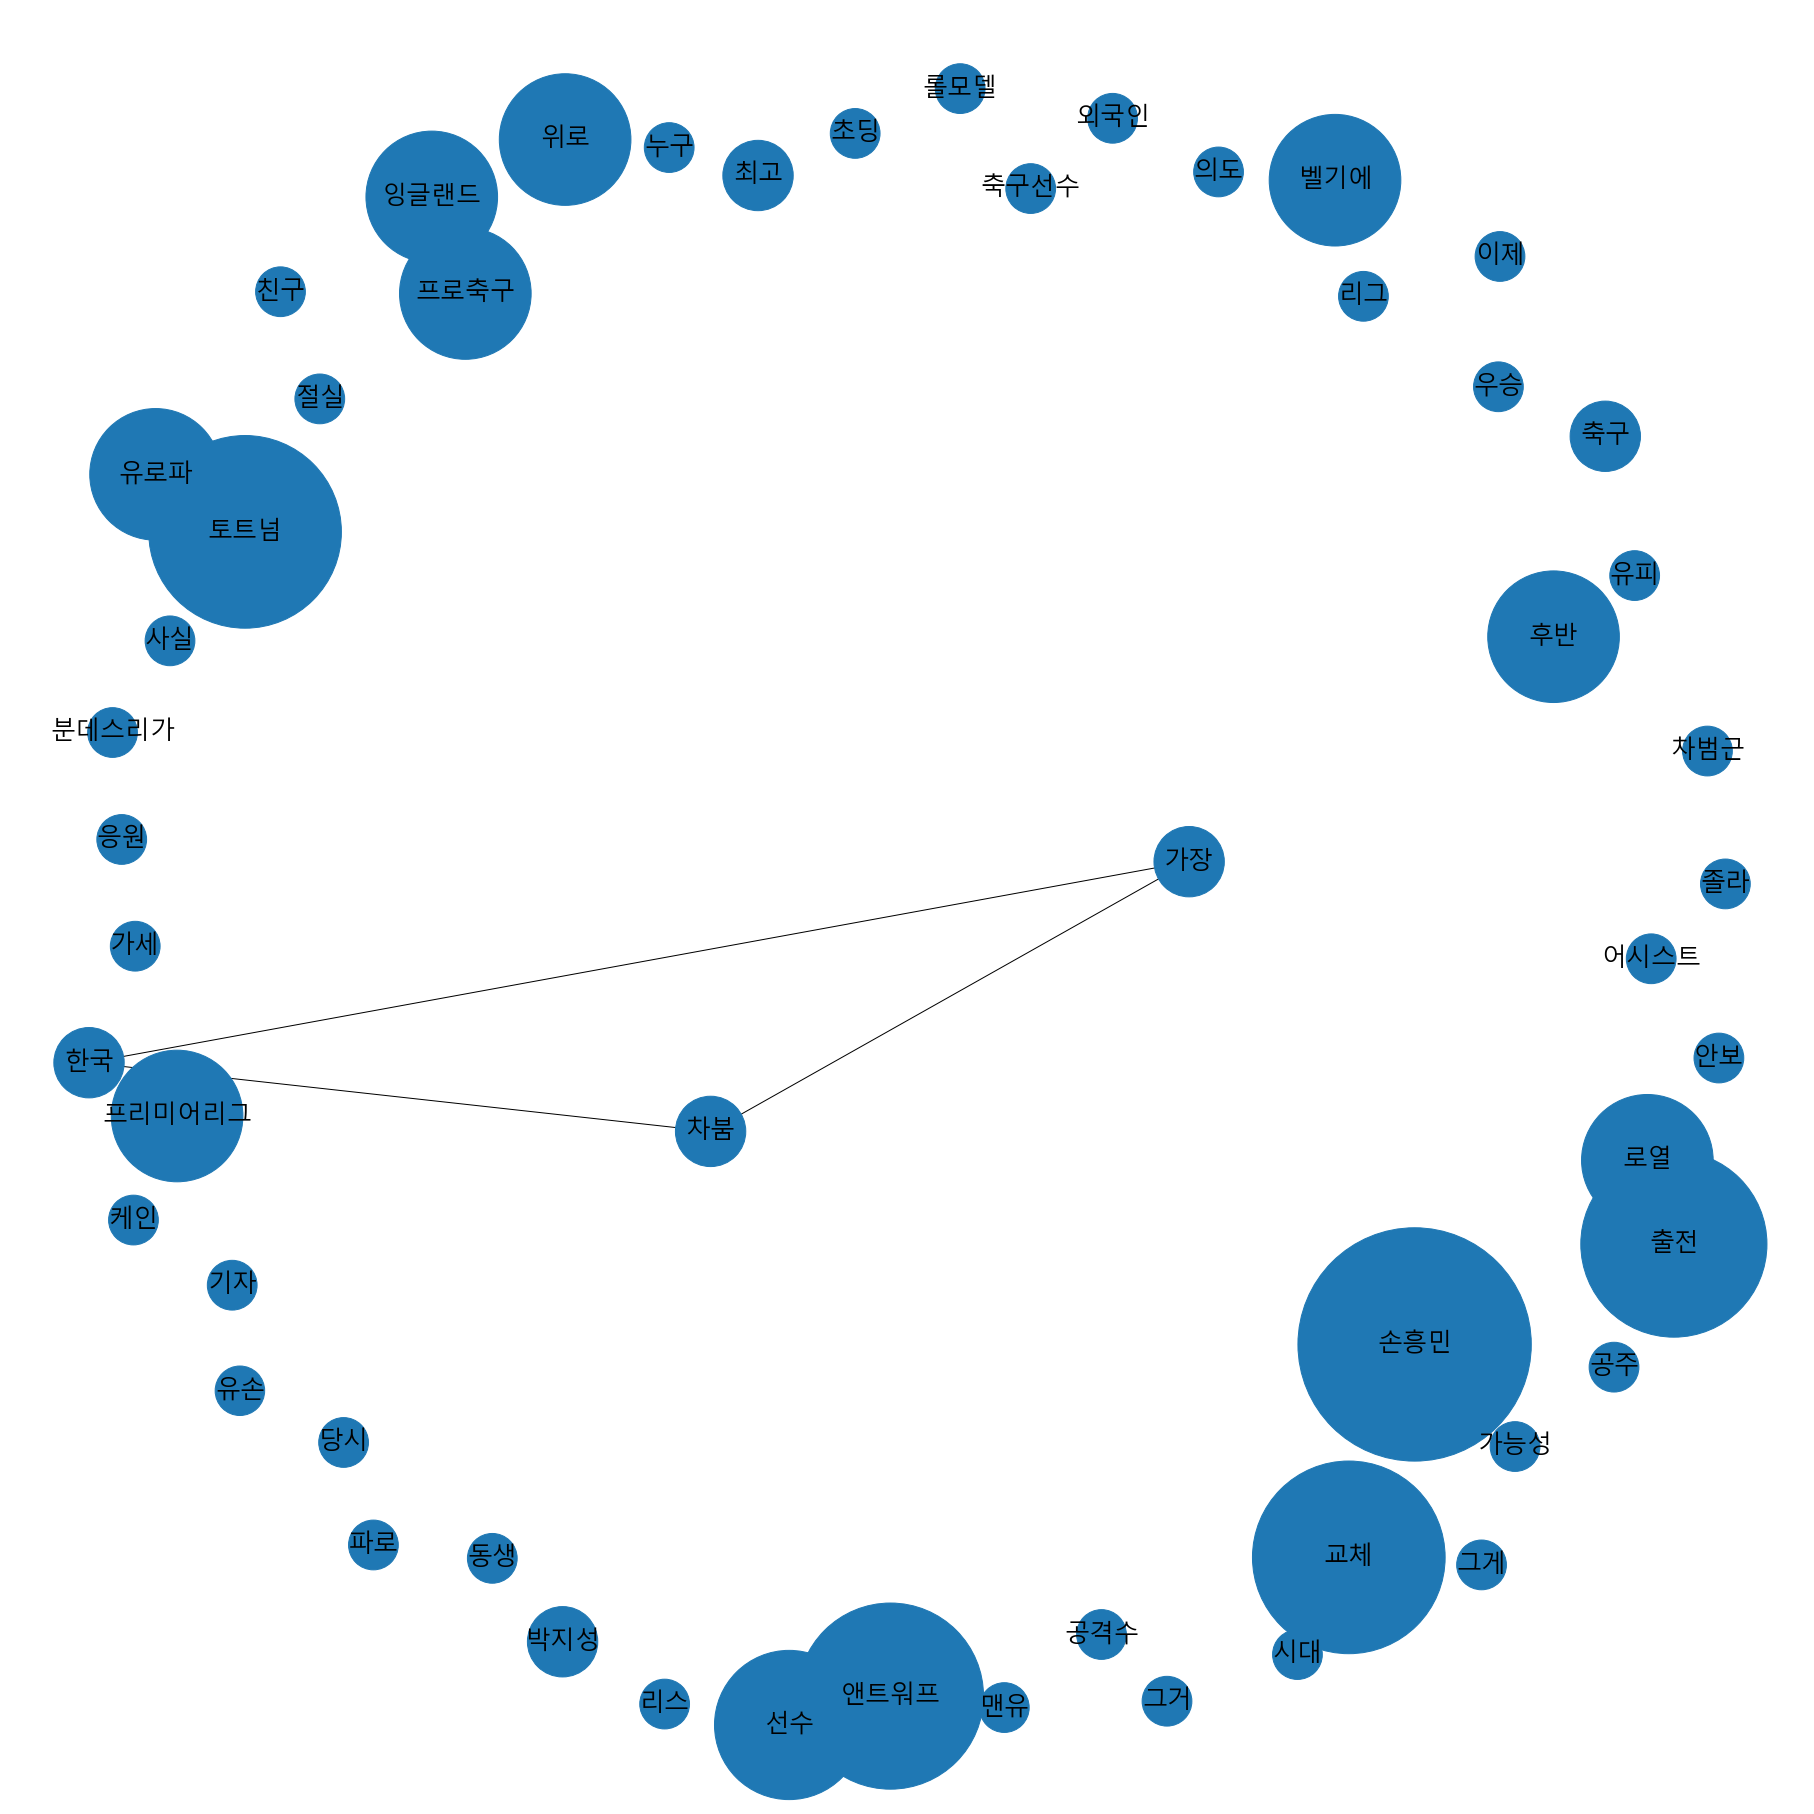

In [55]:
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    # G.add_weighted_edges_from() : 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size = 25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()